<a href="https://colab.research.google.com/github/RevinFahhlefy/Tugas-AI/blob/BMKG-Earthquake-Repository/BMKG_Earthquake_Repository.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Nama : [ Muhammad Revin Putra Fahlefi ]
# NIM  : [ 20220801278 ]
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
# Upload dataset
uploaded = files.upload()  # Mengunggah file CSV dari komputer Anda

Saving katalog_gempa.csv to katalog_gempa.csv


In [ ]:
# Pastikan nama file sesuai dengan file yang diunggah
file_path = 'katalog_gempa.csv'
df = pd.read_csv(file_path)  # Membaca file CSV setelah diunggah

In [ ]:
# Informasi Umum Dataset
print("Informasi Dataset:")
print(df.info())

print("\nContoh Data:")
print(df.head())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92887 entries, 0 to 92886
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tgl      92887 non-null  object 
 1   ot       92887 non-null  object 
 2   lat      92887 non-null  float64
 3   lon      92887 non-null  float64
 4   depth    92887 non-null  int64  
 5   mag      92887 non-null  float64
 6   remark   92887 non-null  object 
 7   strike1  2735 non-null   float64
 8   dip1     2735 non-null   float64
 9   rake1    2735 non-null   float64
 10  strike2  2735 non-null   float64
 11  dip2     2735 non-null   float64
 12  rake2    2735 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 9.2+ MB
None

Contoh Data:
          tgl            ot   lat     lon  depth  mag  \
0  2008/11/01  21:02:43.058 -9.18  119.06     10  4.9   
1  2008/11/01  20:58:50.248 -6.55  129.64     10  4.6   
2  2008/11/01  17:43:12.941 -7.01  106.63    121  

In [ ]:
# 2. Mengatasi Nilai Kosong
print("\nJumlah Nilai Kosong per Kolom:")
print(df.isnull().sum())


Jumlah Nilai Kosong per Kolom:
tgl            0
ot             0
lat            0
lon            0
depth          0
mag            0
remark         0
strike1    90152
dip1       90152
rake1      90152
strike2    90152
dip2       90152
rake2      90152
dtype: int64


In [ ]:
# Menghapus kolom dengan banyak nilai kosong
df = df.dropna(axis=1, thresh=int(0.6 * len(df)))
print("\nKolom Setelah Menghapus yang Banyak Nilai Kosong:")
print(df.columns)


Kolom Setelah Menghapus yang Banyak Nilai Kosong:
Index(['tgl', 'ot', 'lat', 'lon', 'depth', 'mag', 'remark'], dtype='object')


In [ ]:
# 3. Analisis Statistik Dasar
print("\nStatistik Deskriptif Dataset:")
print(df[['depth', 'mag', 'lat', 'lon']].describe())


Statistik Deskriptif Dataset:
              depth           mag           lat           lon
count  92887.000000  92887.000000  92887.000000  92887.000000
mean      49.009399      3.592788     -3.404577    119.159707
std       76.761070      0.834042      4.354584     10.833202
min        2.000000      1.000000    -11.000000     94.020000
25%       10.000000      3.000000     -7.885000    113.170000
50%       16.000000      3.500000     -2.910000    121.160000
75%       54.000000      4.200000      0.140000    126.900000
max      750.000000      7.900000      6.000000    142.000000


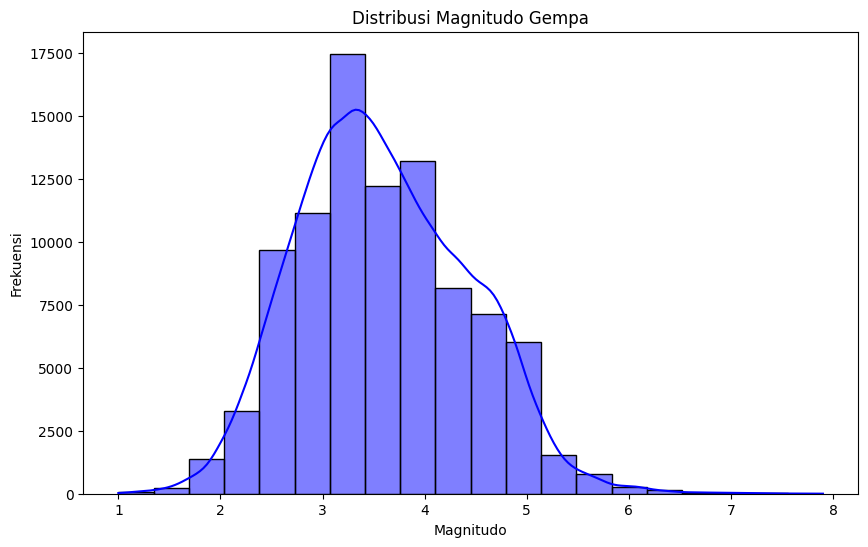

In [ ]:
# 4. Visualisasi Data
# Histogram Magnitudo
plt.figure(figsize=(10, 6))
sns.histplot(df['mag'], bins=20, kde=True, color='blue')
plt.title('Distribusi Magnitudo Gempa')
plt.xlabel('Magnitudo')
plt.ylabel('Frekuensi')
plt.show()

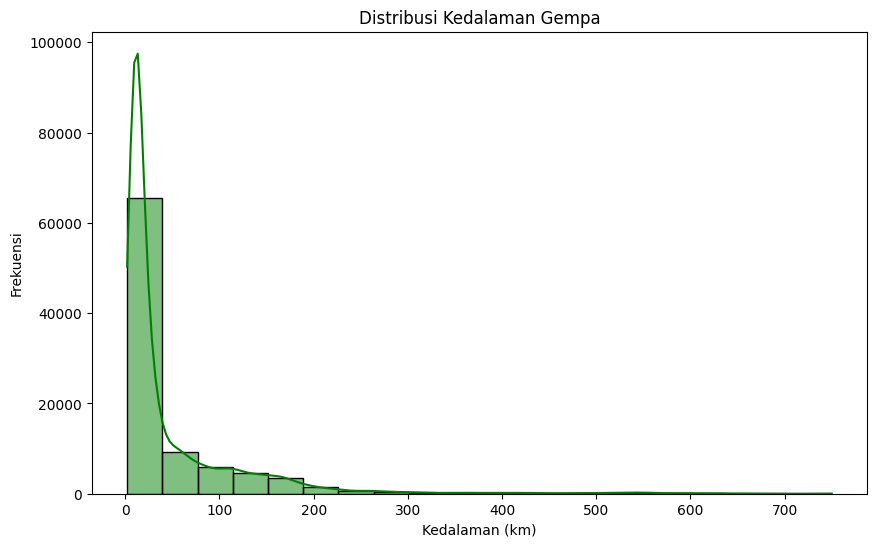

In [ ]:
# Sebaran Kedalaman Gempa
plt.figure(figsize=(10, 6))
sns.histplot(df['depth'], bins=20, kde=True, color='green')
plt.title('Distribusi Kedalaman Gempa')
plt.xlabel('Kedalaman (km)')
plt.ylabel('Frekuensi')
plt.show()

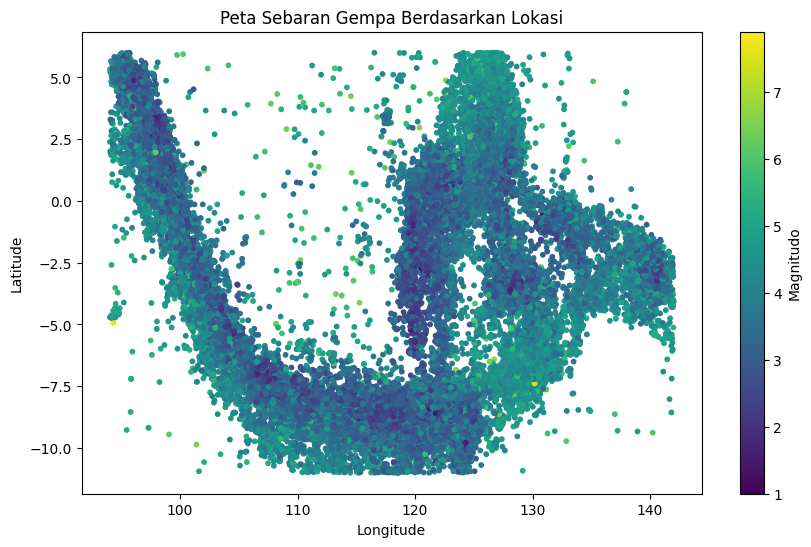

In [ ]:

# 5. Scatter Plot: Lokasi Gempa Berdasarkan Lintang dan Bujur
plt.figure(figsize=(10, 6))
plt.scatter(df['lon'], df['lat'], c=df['mag'], cmap='viridis', s=10)
plt.colorbar(label='Magnitudo')
plt.title('Peta Sebaran Gempa Berdasarkan Lokasi')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
# 6. Analisis Temporal: Tren Magnitudo Berdasarkan Waktu
df['tgl'] = pd.to_datetime(df['tgl'], errors='coerce')

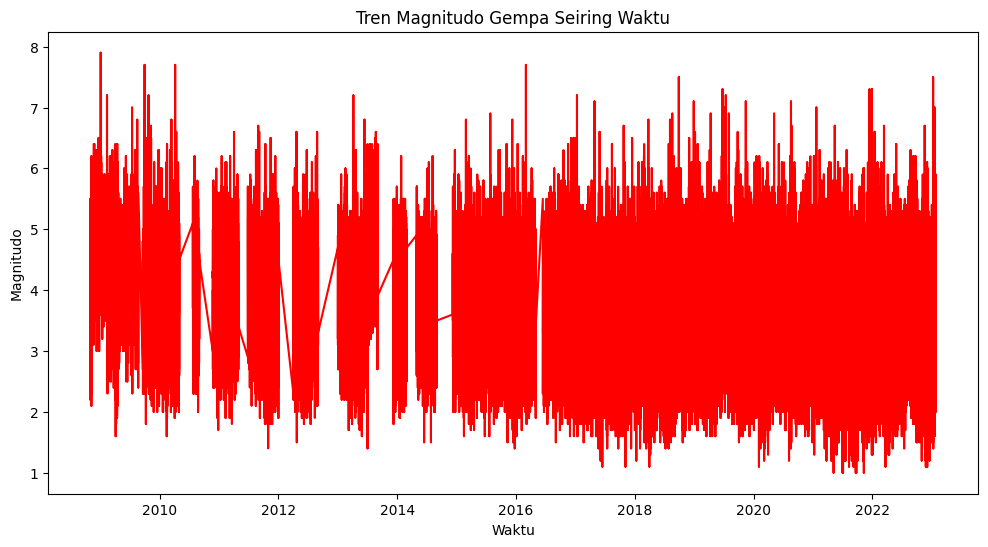

In [ ]:
# Line plot magnitudo gempa berdasarkan waktu
plt.figure(figsize=(12, 6))
plt.plot(df['tgl'], df['mag'], color='red')
plt.title('Tren Magnitudo Gempa Seiring Waktu')
plt.xlabel('Waktu')
plt.ylabel('Magnitudo')
plt.show()

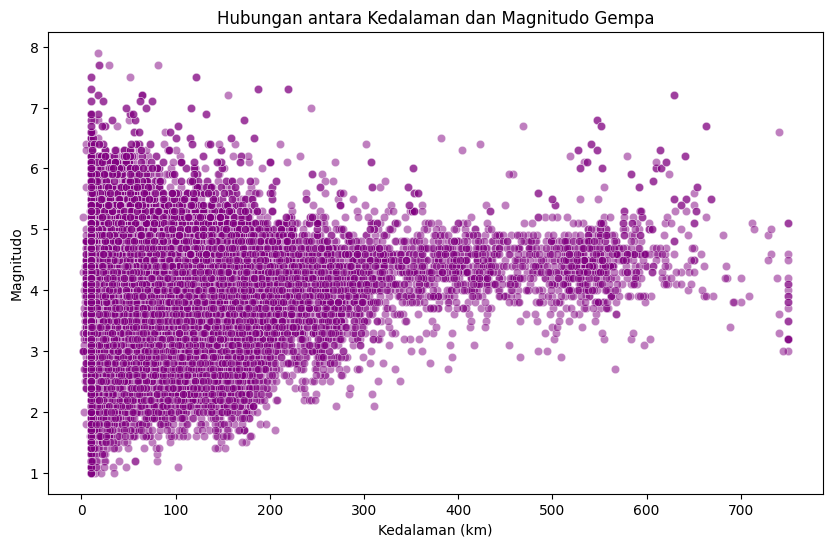

In [ ]:
# 7. Analisis Kedalaman vs Magnitudo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='depth', y='mag', data=df, alpha=0.5, color='purple')
plt.title('Hubungan antara Kedalaman dan Magnitudo Gempa')
plt.xlabel('Kedalaman (km)')
plt.ylabel('Magnitudo')
plt.show()

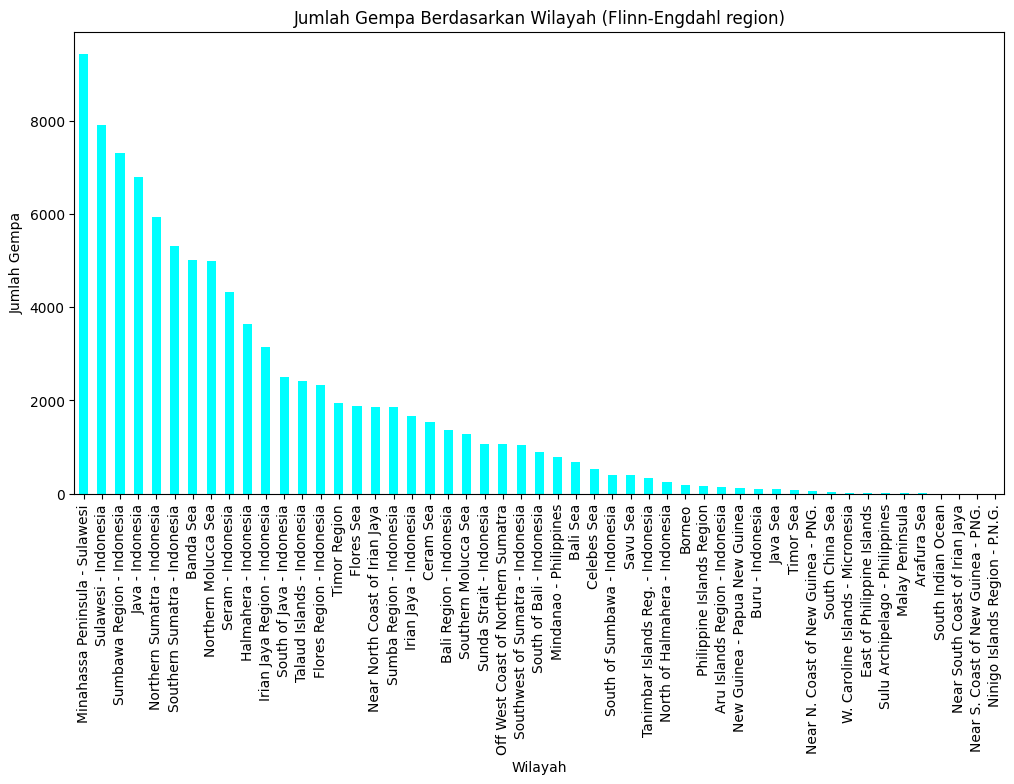

In [ ]:
# 8. Analisis Berdasarkan Wilayah
if 'remark' in df.columns:
    plt.figure(figsize=(12, 6))
    df['remark'].value_counts().plot(kind='bar', color='cyan')
    plt.title('Jumlah Gempa Berdasarkan Wilayah (Flinn-Engdahl region)')
    plt.xlabel('Wilayah')
    plt.ylabel('Jumlah Gempa')
    plt.show()
else:
    print("Kolom 'remark' tidak ditemukan dalam dataset.")

In [ ]:
# 9. Menyimpan Data yang Telah Diproses
df.to_csv('katalog_gempa_cleaned.csv', index=False)
print("Data yang telah dibersihkan disimpan sebagai 'katalog_gempa_cleaned.csv'")
files.download('katalog_gempa_cleaned.csv')

Data yang telah dibersihkan disimpan sebagai 'katalog_gempa_cleaned.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>